## Setup

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

### Load the dataset mushrooms

In [2]:

df = pd.read_csv('../KNN/Data-Mushroom/mushrooms.csv', skiprows=2)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data exploration

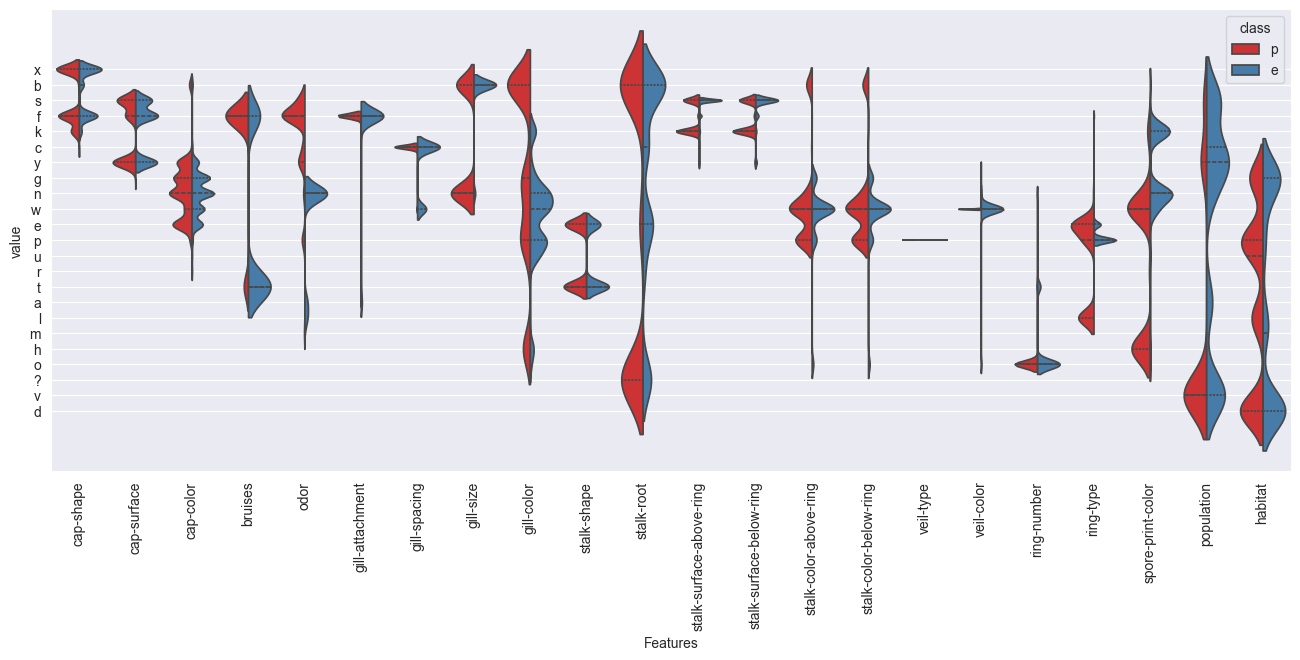

In [3]:
df_div = pd.melt(df, "class", var_name="Features")
fig, ax = plt.subplots(figsize=(16, 6))

p = sns.violinplot(ax=ax, x="Features", y="value", hue="class", split=True, data=df_div, inner='quartile',
                   palette='Set1', density_norm='count')
tick_locations = ax.get_xticks()

# Set the tick locations explicitly
ax.set_xticks(tick_locations)

x_columns = [col for col in df.columns if col != 'class']
# Now set the tick labels with rotation
ax.set_xticklabels(list(x_columns), rotation=90)

plt.show()

<Axes: >

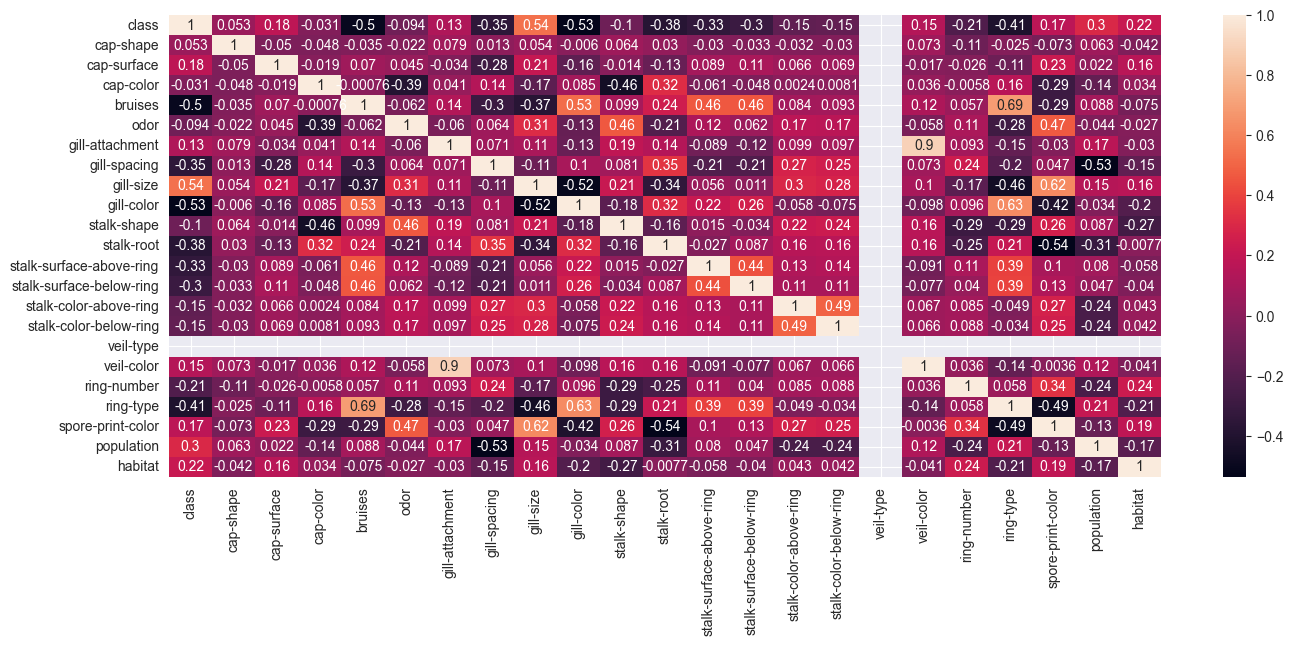

In [4]:
## No meaning but interesting to see 
df_num = df.apply(LabelEncoder().fit_transform)

fig, ax = plt.subplots(figsize=(16, 6))

sns.heatmap(df_num.corr(), annot=True)

In [5]:
features_with_unique_values = df.nunique()[df.nunique() == 1].index.tolist()
df.drop(columns=features_with_unique_values, inplace=True)

## Preprocessing the data

In [6]:
columns = df.columns
y_column = 'class'
x_columns = [col for col in columns if col != y_column]

label_encoder = LabelEncoder()
X = df[x_columns].apply(label_encoder.fit_transform)
y = df[y_column]

## Split the data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Train the model

In [8]:
classifier = LogisticRegression(max_iter=2000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

## Evaluate the model

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           e      0.934     0.964     0.949       811
           p      0.963     0.932     0.948       814

    accuracy                          0.948      1625
   macro avg      0.949     0.948     0.948      1625
weighted avg      0.949     0.948     0.948      1625



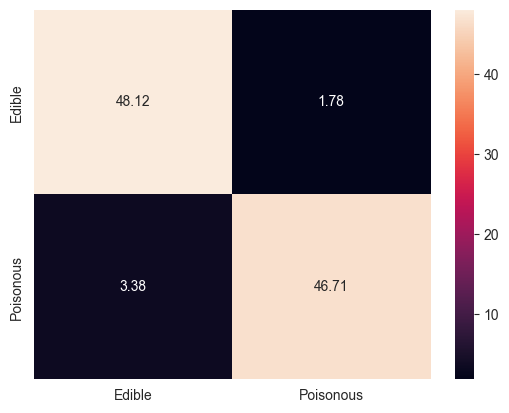

In [13]:
results = confusion_matrix(y_test, y_pred, labels=['e', 'p'])

results = results / results.sum() * 100
sns.heatmap(results, annot=True, fmt=".2f")
labels = ['Edible','Poisonous']
plt.xticks([0.5, 1.5], labels)
plt.yticks([0.5, 1.5], labels)
plt.show()